<a href="https://colab.research.google.com/github/sabrybenamor/ML-PROJECTS/blob/main/Cancer_cell_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# TensorFlow and Keras imports for building and training deep learning models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Scikit-learn imports for data loading, preprocessing, model selection, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
# Load the breast cancer dataset from scikit-learn
data = load_breast_cancer()

# Create a pandas DataFrame with the feature data and column names
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target labels (malignant or benign) as a new column to the DataFrame
df['target'] = data.target

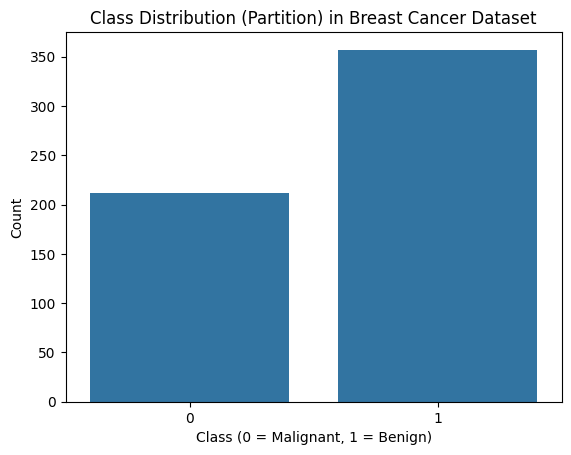

In [79]:
# Countplot using seaborn
sns.countplot(x='target', data=df)
plt.title('Class Distribution (Partition) in Breast Cancer Dataset')
plt.xlabel('Class (0 = Malignant, 1 = Benign)')
plt.ylabel('Count')
plt.show()

In [80]:
# Split the dataset into training and testing sets.
# - Features (all columns except 'target') are assigned to X.
# - Target labels ('target' column) are assigned to y.
# - 80% of the data is used for training, 20% for testing.
# - random_state=42 ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1),  # Features
    df['target'],               # Target
    test_size=0.2,              # 20% for testing
    random_state=42             # For reproducibility
)

In [81]:
# Build a simple neural network model for binary classification using Keras Sequential API
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=30))   # Input layer with 30 features and one hidden layer with 16 neurons using ReLU activation
model.add(Dense(1, activation='sigmoid'))               # Output layer with 1 neuron and sigmoid activation for binary classification

In [82]:
# Compile the model using the Adam optimizer, binary cross-entropy loss, and accuracy as a metric.
# - 'binary_crossentropy' is appropriate because this is a binary classification problem (malignant vs. benign).
#   It measures how well the predicted probabilities match the true binary labels.
# - 'accuracy' is chosen as the metric since it provides an intuitive measure of how many predictions are correct,
#   which is well suited for evaluating performance in binary classification tasks.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
# Train the neural network model on the training data.
# - Trains for 100 epochs with a batch size of 32 samples per update.
# - Uses 20% of the training data for validation at each epoch (validation_split=0.2), allowing monitoring of model performance on data not seen during training.
# - verbose=1 displays progress bars and training details for each epoch.
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3751 - loss: 62.8816 - val_accuracy: 0.3626 - val_loss: 42.8882
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3585 - loss: 33.2420 - val_accuracy: 0.2637 - val_loss: 18.8041
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2567 - loss: 17.2672 - val_accuracy: 0.4176 - val_loss: 17.0683
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3578 - loss: 16.0087 - val_accuracy: 0.3297 - val_loss: 11.6304
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3153 - loss: 10.6586 - val_accuracy: 0.3626 - val_loss: 8.6847
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3776 - loss: 7.8490 - val_accuracy: 0.4396 - val_loss: 6.8202
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4578 - loss: 6.5596 - val_accuracy: 0.4725 - val_loss: 5.7546
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4741 - loss: 5.5226 - val_accuracy

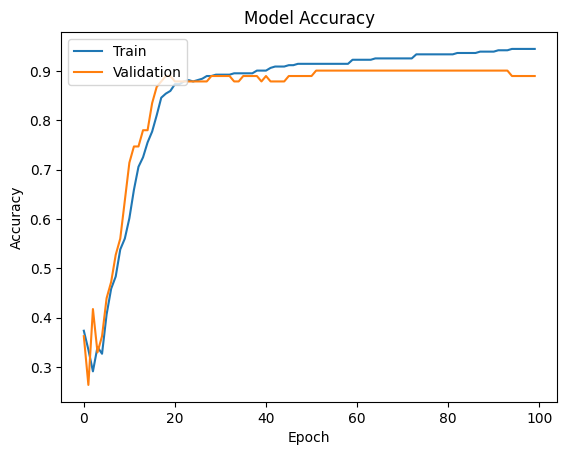

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [85]:
# Evaluate the trained model on the test set.
# Returns the loss value and the accuracy (since 'accuracy' was specified as a metric during compilation).
loss, accuracy = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9355 - loss: 0.1085


In [86]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_log)

Accuracy: 0.956140350877193


In [87]:
# Core function: This code trains a K-Nearest Neighbors (KNN) classifier on the training data and evaluates its accuracy on the test set.
Knn_model = KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(X_train, y_train)
y_pred = Knn_model.predict(X_test)
accuracy_k = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_k)

Accuracy: 0.956140350877193


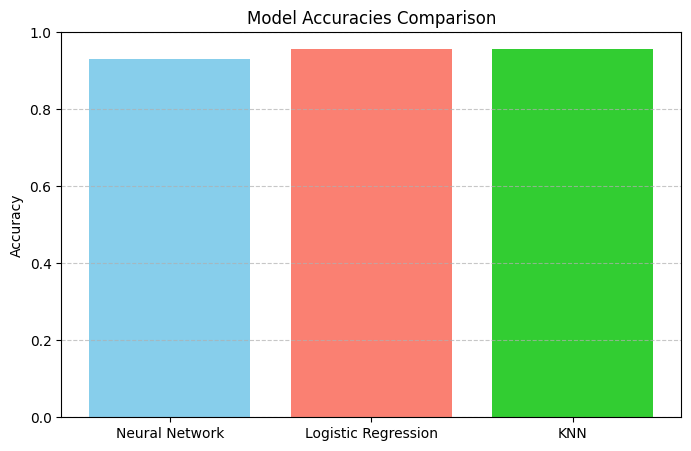

In [88]:
accuracy_nn = accuracy  # Neural network accuracy from model.evaluate
accuracy_logistic = accuracy_log  # After LogisticRegression evaluation
accuracy_knn = accuracy_k       # After KNeighborsClassifier evaluation

# Collect accuracies into a list
model_names = ['Neural Network', 'Logistic Regression', 'KNN']
accuracies = [accuracy_nn, accuracy_logistic, accuracy_knn]

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'limegreen'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()